In [1]:
from settings import *

random_rho0s: setting seed=33042


In [2]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

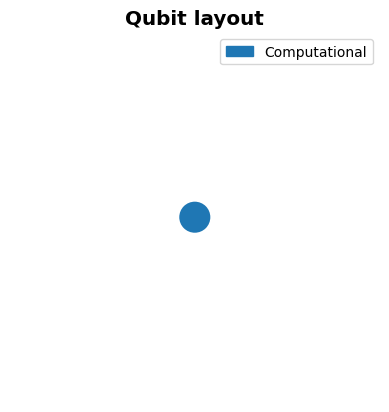

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=10475
Iteration: 0 
            Max gradient term: 0.09125882800303797 
            Current gradient: [0.09125883 0.02733846 0.0740745  0.         0.0740745  0.06147408
 0.05981784 0.         0.05981784 0.07779034 0.05904623 0.
 0.05904623 0.06420468 0.07233106 0.         0.07233106 0.03077759
 0.08983462 0.        ] 
            Current error: 0.14951272222029163 
            Current sigma values: (1, 0, 10)


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.0011920318496324266 
            Current gradient: [ 0.0009238  -0.00031922  0.00119203  0.          0.00119203 -0.00026841
  0.00109023  0.          0.00109023 -0.00053672  0.00080417  0.
  0.00080417 -0.00083201  0.00067042  0.          0.00067042 -0.00083358
  0.00089656  0.        ] 
            Current error: 0.002226235160059751 
            Current sigma values: (2, 0, 1.25)
Iteration: 20 
            Max gradient term: 0.0005614971732817615 
            Current gradient: [ 3.59748604e-04 -1.82867029e-05  5.61497173e-04  0.00000000e+00
  5.61497173e-04  2.39612653e-05  4.82521933e-04  0.00000000e+00
  4.82521933e-04 -1.78450312e-04  2.65316185e-04  0.00000000e+00
  2.65316185e-04 -4.03012790e-04  1.65655629e-04  0.00000000e+00
  1.65655629e-04 -4.06969243e-04  3.39482039e-04  0.00000000e+00] 
            Current error: 0.0022235015372462346 
            Current sigma values: (2, 1, 0.625)
Iteration: 30 
            Max gradient ter

In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([-0.11512209,  0.11172998, -0.01459596,  0.4       , -0.01459596,
       -0.04764247,  0.05584912,  0.4       ,  0.05584912, -0.1219765 ,
        0.06395902,  0.4       ,  0.06395902, -0.05361727,  0.00347873,
        0.4       ,  0.00347873,  0.10096198, -0.10291147,  0.4       ])

rho_rand_haar: seed=47351


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

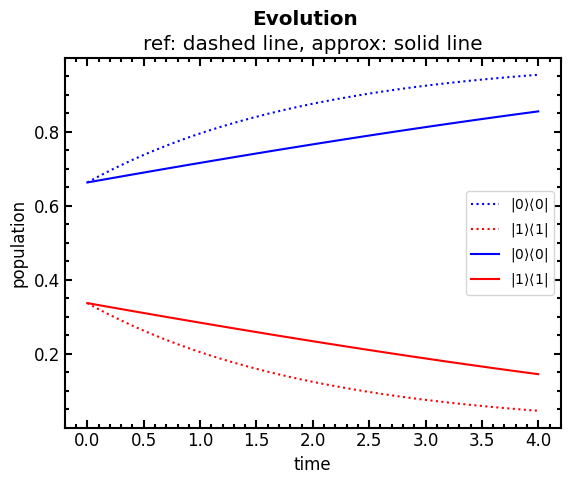

In [7]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

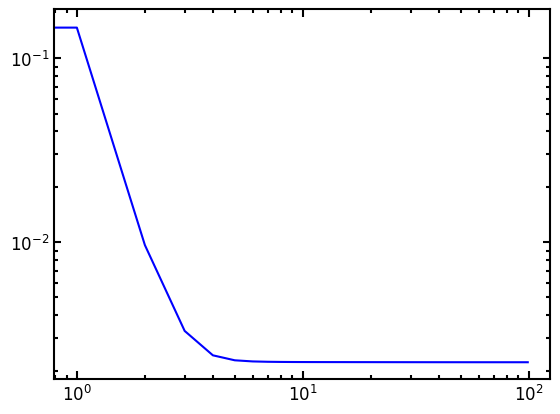

In [8]:
plt.loglog(errors)